In [2]:
import openai

apikey = <your-apikey>
openai.api_key = apikey
client = openai.Client(api_key=apikey)

In [3]:
file = client.files.create(
    file=open("Financials Sample Data Sample.csv", "rb"),
    purpose='assistants'
)

In [4]:
client

In [5]:
file

FileObject(id='file-mZIVfKmm8MsKKGprn3dFFGcA', bytes=2121, created_at=1700787434, filename='Financials Sample Data Sample.csv', object='file', purpose='assistants', status='processed', status_details=None)

In [6]:
assistant = client.beta.assistants.create(
    name="Data visualizer",
    # description="You are great at creating beautiful data visualizations. You analyze data present in .csv files, understand trends, and come up with data visualizations relevant to those trends. You also share a brief text summary of the trends observed.",
    description="You are great at creating beautiful data analysis. You analyze data present in .csv files, understand trends. You can share a brief text summary of the trends observed.",
    model="gpt-4-1106-preview",
    tools=[{"type": "code_interpreter"}],
    file_ids=[file.id]
)

In [7]:
assistant

Assistant(id='asst_ZdS8Xgm3kHX1J4fbM45e7uMc', created_at=1700787436, description='You are great at creating beautiful data analyzing. You analyze data present in .csv files, understand trends. You can share a brief text summary of the trends observed.', file_ids=['file-mZIVfKmm8MsKKGprn3dFFGcA'], instructions=None, metadata={}, model='gpt-4-1106-preview', name='Data visualizer', object='assistant', tools=[ToolCodeInterpreter(type='code_interpreter')])

In [8]:
thread = client.beta.threads.create(
    messages=[
        {
            "role": "user",
            # "content": "Create 3 data visualizations based on the trends in this file.",
            "content": "分析一下这个文件",
            "file_ids": [file.id]
        }
    ]
)

In [9]:
thread = client.beta.threads.create()

In [10]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Create 3 data visualizations based on the trends in this file.",
    file_ids=[file.id]
)

In [11]:
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
    instructions=""
)

File downloaded successfully.
It looks like we've encountered an error because the pie chart does not allow negative values. To resolve this, we should consider only the expenses (absolute values) since the dataset represents expenses as negative numbers.

I will correct this and generate the pie chart again with the absolute values of expenses for December 2012.
resp: None


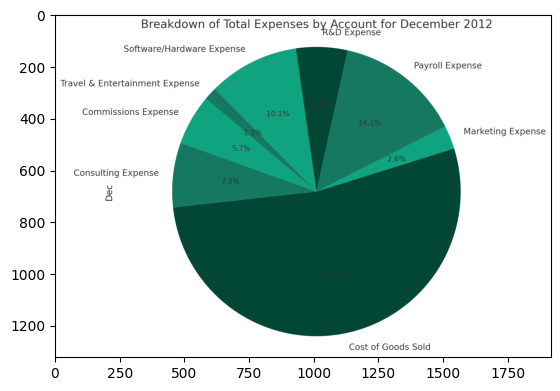

In [43]:
import time
from matplotlib import pyplot as plt
from PIL import Image

result = None
while True:
    # 查询消息的状态
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )
    # 如果状态完成，则获取结果，break
    if run.status == "completed":
        messages = client.beta.threads.messages.list(thread_id=thread.id)
        for c in messages.data[0].content:
            if type(c) == openai.types.beta.threads.message_content_image_file.MessageContentImageFile:
                api_response = client.files.with_raw_response.retrieve_content(
                    messages.data[0].content[0].image_file.file_id)

                if api_response.status_code == 200:
                    content = api_response.content
                    with open('image.png', 'wb') as f:
                        f.write(content)
                    print('File downloaded successfully.')
                img = Image.open("image.png")
                plt.imshow(img)
            elif type(c) == openai.types.beta.threads.message_content_text.MessageContentText:
                print(messages.data[1].content[0].text.value)
            else:
                raise NotImplementedError(f"Message type not implemented, {type(c)}")
        break
    # 继续请求
    time.sleep(10)
    print(f"still waiting for the respone, status: {run.status}")

# print(f"resp: {result}")

In [28]:
 # print(messages.data[0].content)

[MessageContentImageFile(image_file=ImageFile(file_id='file-FOuR9a557f0MUy5ao4v6S5RE'), type='image_file'), MessageContentText(text=Text(annotations=[], value='Here is the pie chart showing the breakdown of total expenses by account category for December 2012. Each slice represents an expense account, and its size indicates the proportion of expenses that the account constitutes.\n\nLastly, let\'s create a bar chart showing the yearly trend for the "Sales" account across each month.'), type='text')]


In [22]:
# api_response = client.files.with_raw_response.retrieve_content(messages.data[0].content[0].image_file.file_id)
# 
# if api_response.status_code == 200:
#     content = api_response.content
#     with open('image.png', 'wb') as f:
#         f.write(content)
#     print('File downloaded successfully.')

File downloaded successfully.


In [26]:
# messages.data[0]

ThreadMessage(id='msg_J1Cli9Lw2Kul3W3TJsPbdAZA', assistant_id='asst_ZdS8Xgm3kHX1J4fbM45e7uMc', content=[MessageContentImageFile(image_file=ImageFile(file_id='file-FOuR9a557f0MUy5ao4v6S5RE'), type='image_file'), MessageContentText(text=Text(annotations=[], value='Here is the pie chart showing the breakdown of total expenses by account category for December 2012. Each slice represents an expense account, and its size indicates the proportion of expenses that the account constitutes.\n\nLastly, let\'s create a bar chart showing the yearly trend for the "Sales" account across each month.'), type='text')], created_at=1700787510, file_ids=[], metadata={}, object='thread.message', role='assistant', run_id='run_JALtpMsUrjgOmoJZWE8RCgO4', thread_id='thread_a5V5FzTeMXQWBab2EiYbzqo4')

In [42]:
# messages.data[1].content[0].text.value

"It looks like we've encountered an error because the pie chart does not allow negative values. To resolve this, we should consider only the expenses (absolute values) since the dataset represents expenses as negative numbers.\n\nI will correct this and generate the pie chart again with the absolute values of expenses for December 2012."

In [29]:
# type(messages.data[0].content[0]), type(messages.data[0].content[1])

(openai.types.beta.threads.message_content_image_file.MessageContentImageFile,
 openai.types.beta.threads.message_content_text.MessageContentText)